In [1]:
# 决策树
import sklearn
import sklearn.tree as tree
tree.__all__

['BaseDecisionTree',
 'DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 'export_graphviz',
 'plot_tree',
 'export_text']

In [2]:
import  pandas as pd
xigua20 = pd.read_csv("xigua2.0.csv",index_col=0)
xigua20

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
编号,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否


In [8]:
xigua20num =xigua20.copy()
for index,row in xigua20.iteritems():
    row_set = row.unique()
    #print(row_set)
    row_dict = dict(zip(row_set,range(1, len(row_set)+1)))
    #print(row_dict)
    xigua20num[index] = row.replace(row_dict)

xigua20num

,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
编号,,,,,,,
1,1,1,1,1,1,1,1
2,2,1,2,1,1,1,1
3,2,1,1,1,1,1,1
4,1,1,2,1,1,1,1
5,3,1,1,1,1,1,1
6,1,2,1,1,2,2,1
7,2,2,1,2,2,2,1
8,2,2,1,1,2,1,1
9,2,2,2,2,2,1,2


In [18]:
x = xigua20num[["色泽","根蒂","敲声","纹理","脐部","触感"]].values
y = xigua20num[['好瓜']].values
xy = sklearn.model_selection.train_test_split(x, y)
xy

[array([[2, 2, 1, 2, 2, 2],
        [1, 3, 3, 1, 3, 2],
        [2, 1, 1, 1, 1, 1],
        [3, 1, 1, 3, 3, 2],
        [1, 1, 2, 2, 2, 1],
        [1, 2, 1, 1, 2, 2],
        [3, 1, 1, 3, 3, 1],
        [3, 3, 3, 3, 3, 1],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 1, 1, 2, 2],
        [1, 1, 2, 1, 1, 1],
        [2, 2, 1, 1, 2, 1]], dtype=int64),
 array([[3, 2, 2, 2, 1, 1],
        [2, 2, 2, 2, 2, 1],
        [1, 2, 1, 2, 1, 1],
        [3, 1, 1, 1, 1, 1],
        [2, 1, 2, 1, 1, 1]], dtype=int64),
 array([[1],
        [2],
        [1],
        [2],
        [2],
        [1],
        [2],
        [2],
        [1],
        [2],
        [1],
        [1]], dtype=int64),
 array([[2],
        [2],
        [2],
        [1],
        [1]], dtype=int64)]

任务二：二者之间的区别是*****


In [19]:
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(xy[0],xy[2])
print(model.score(xy[0],xy[2]),model.score(xy[1],xy[3]))

1.0 0.6


[Text(1860.0, 2243.4285714285716, '脐部 <= 2.5\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]\nclass = 好瓜'),
 Text(1240.0, 1898.2857142857142, '脐部 <= 1.5\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]\nclass = 好瓜'),
 Text(620.0, 1553.142857142857, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 好瓜'),
 Text(1860.0, 1553.142857142857, '敲声 <= 1.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = 好瓜'),
 Text(1240.0, 1208.0, '色泽 <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = 好瓜'),
 Text(620.0, 862.8571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 好瓜'),
 Text(1860.0, 862.8571428571427, '纹理 <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = 好瓜'),
 Text(1240.0, 517.7142857142856, '触感 <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 好瓜'),
 Text(620.0, 172.57142857142844, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 好瓜'),
 Text(1860.0, 172.57142857142844, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 坏瓜'),
 Text(2480.0, 5

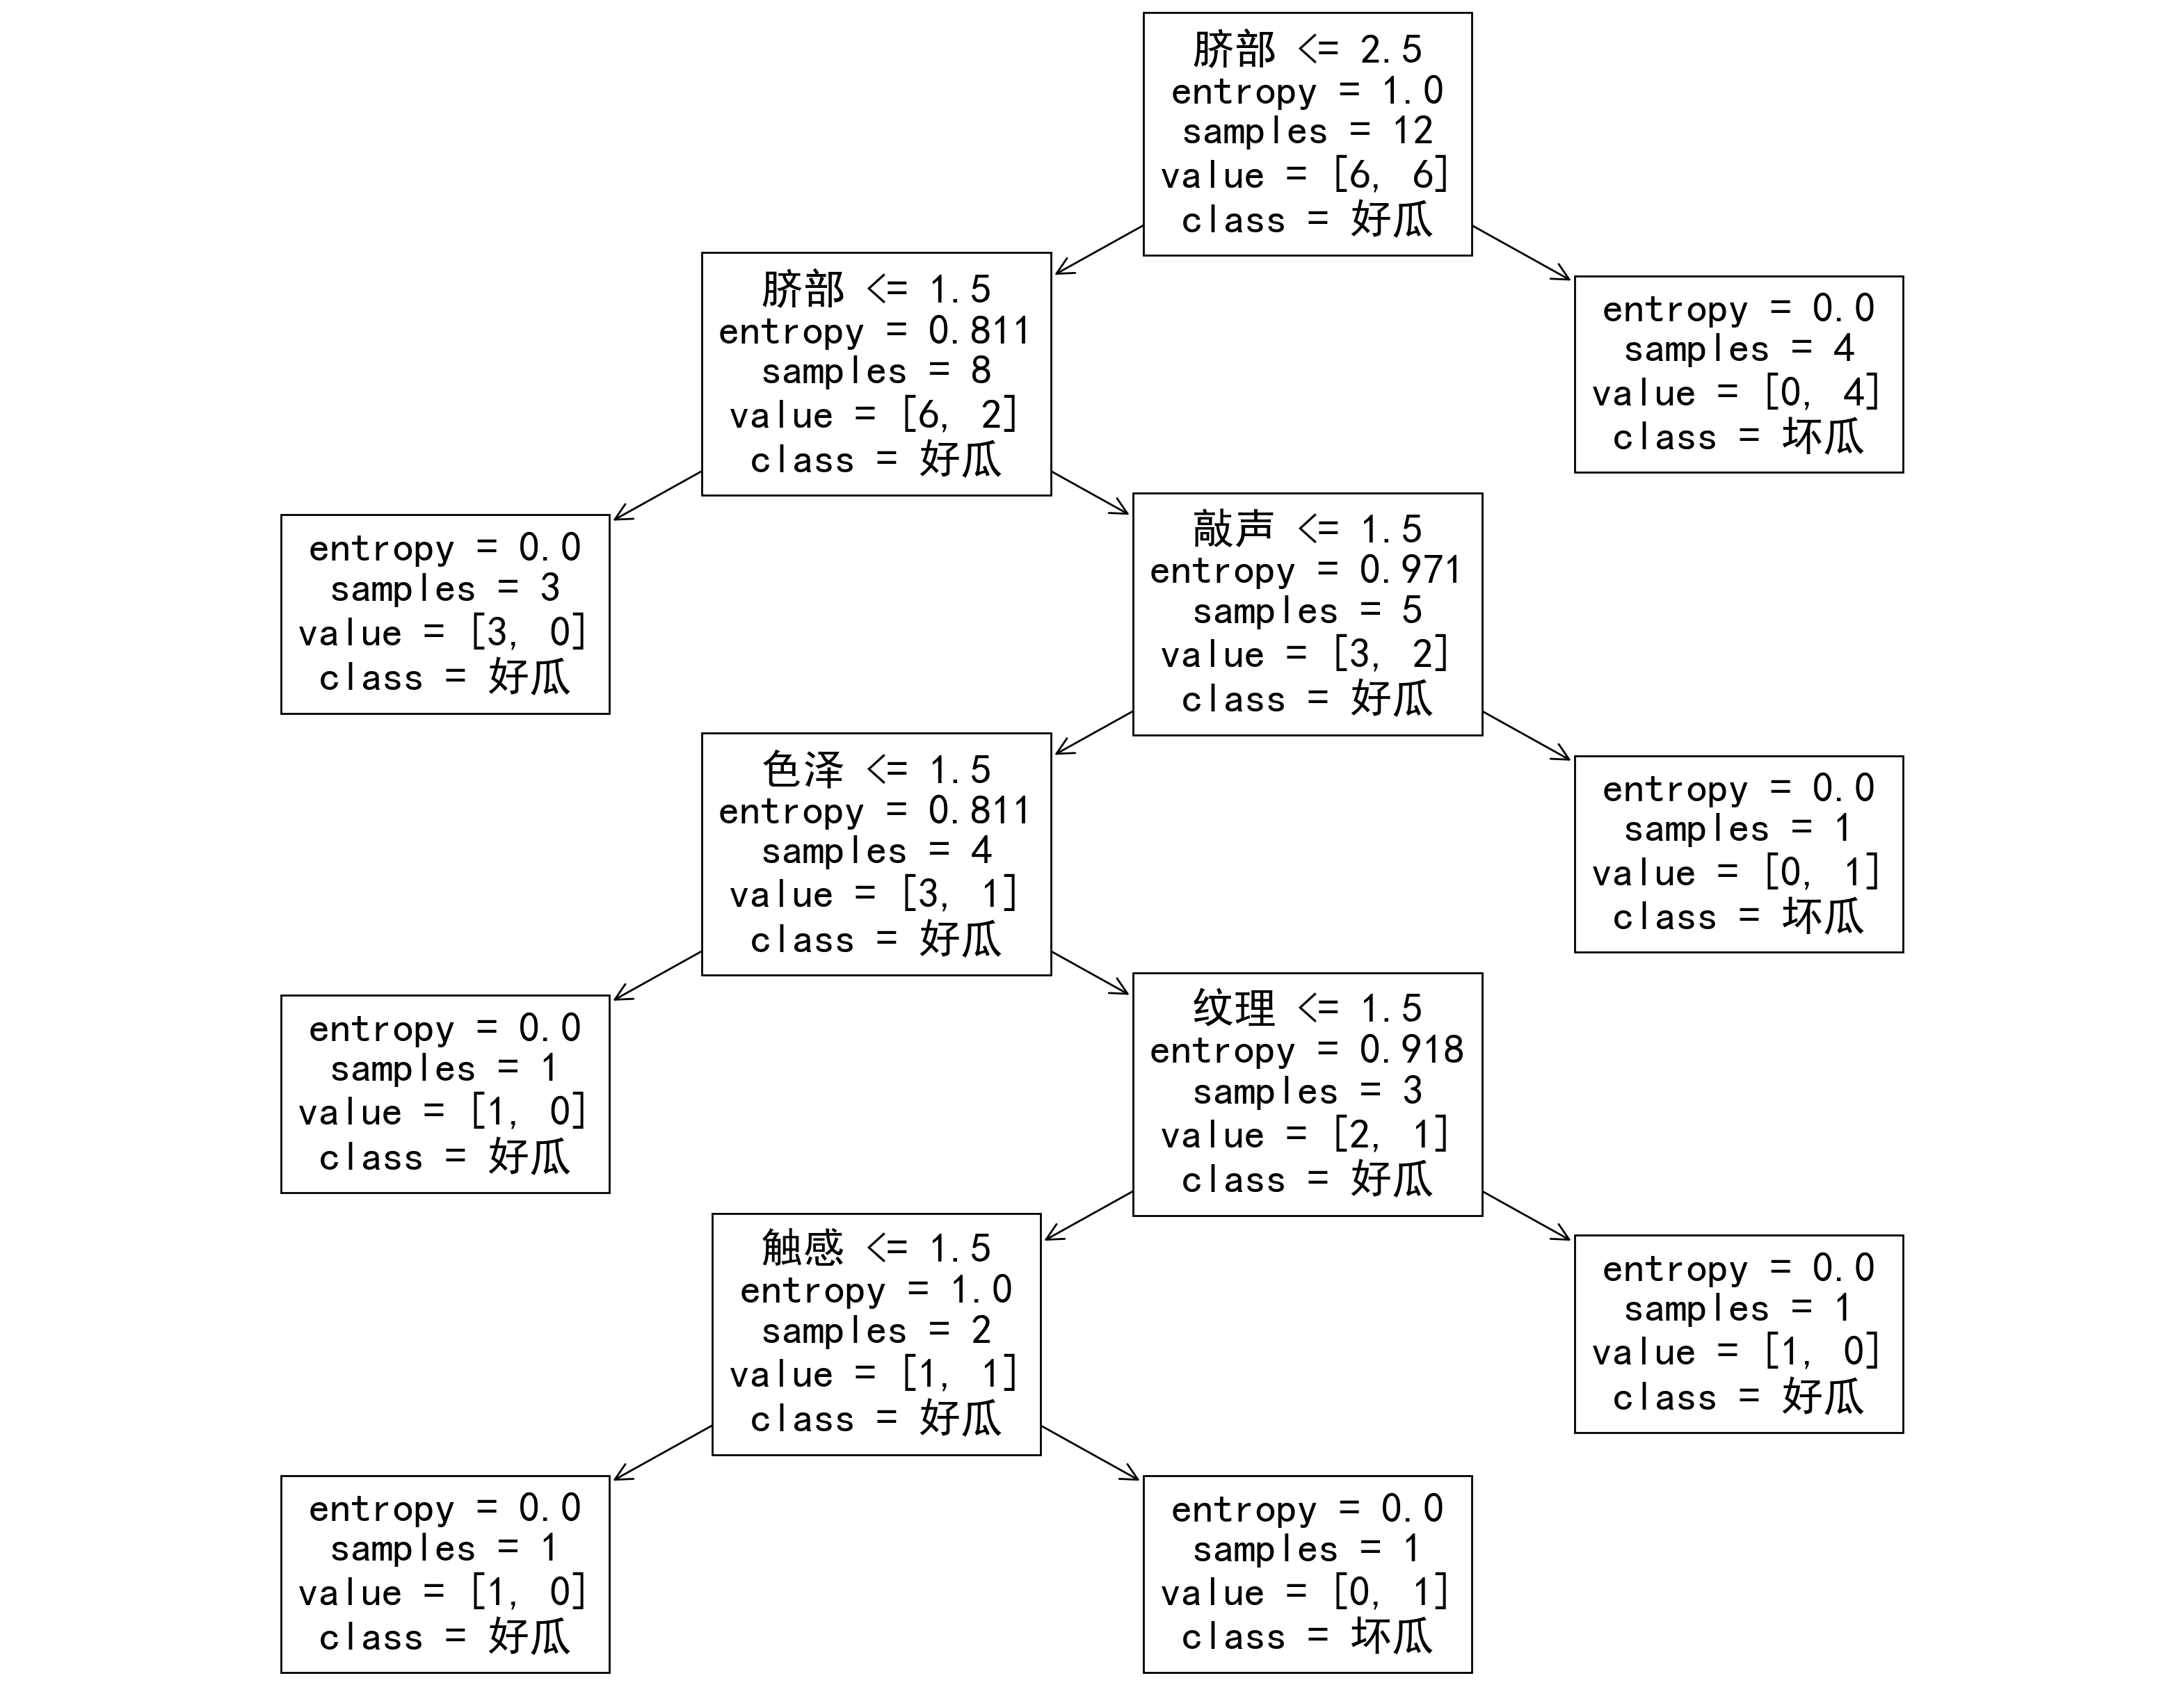

In [23]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 16)
matplotlib.rcParams['figure.dpi'] = 200
matplotlib.rcParams['font.sans-serif'] = ['simhei']
tree.plot_tree(model, feature_names=xigua20.columns,class_names=['好瓜','坏瓜'])